# Kaggle Dataset Analysis

### <span style="color:#32CAEC"> Contents </span>
- 0. Author information
- 1. Introduction
    - 1.1 Basic information about the dataset
    - 1.2 What is Airbnb?
    - 1.3 About Amsterdam
    - 1.4 Detailed information about the dataset
- 2. Data loading and library imports
    - 2.1 Library imports
    - 2.2 Data loading
- 3. How much data do we really have?

## <span style="color:navy"> 0. Author information </span>
- **Full name:** Alejandro Donaire Salvador
- **University ID (NIU):** 1600697
- **Personal e-mail:** aledonairesa@gmail.com

## <span style="color:navy"> 1. Introduction </span>

### <span style="color:#32CAEC"> 1.1 Basic information about the dataset </span>

The dataset is called "Airbnb Amsterdam" and can be found here: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam. The data dates from December 6th, 2018 and comes from http://insideairbnb.com/. It weighs about 0.4GB and has been downloaded +4000 times in Kaggle as per November 2022.

### <span style="color:#32CAEC"> 1.2 What is Airbnb? </span>

Airbnb is a **public company** that manages an **online marketplace** (a type of e-commerce) focused on **short-term homestays and experiences**. It is based in San Francisco, California, and was founded in 2008 by Brian Chesky and others. It currently serves worldwide and **accounts for more than 20% of the vacation rental industry** as a whole. *Sources: https://en.wikipedia.org/wiki/Airbnb and https://hospitable.com/competitors-for-airbnb/*.

Here's its logo:
<img src="images/airbnblogo.png" alt="drawing" width="250"/>

### <span style="color:#32CAEC"> 1.3 About Amsterdam </span>

Amsterdam is the **capital and most populous city of the Netherlands** (northwestern Europe). Its **population is about 910k** people as per the city proper and has a large number of canals and bodies of water. Its climate is oceanic, meaning that it's humid, the summers are cool (about 20ºC), the winters are mild (about 5ºC) and the annual temperature is relatively narrow. *Sources: https://en.wikipedia.org/wiki/Amsterdam and https://www.wolframalpha.com/input?key=&i=climate+Amsterdam*.

Here's a picture of the map of Amsterdam with Airbnb home/apartments (red dots) and private rooms (green dots) as per September 2022 (*Source: http://insideairbnb.com/amsterdam*):

<img src="images/amsterdamairbnb.png" alt="drawing" width="450"/>

### <span style="color:#32CAEC"> 1.4 Detailed information about the dataset </span>

The entire dataset consists of **6 `.csv` files**:
- `listings.csv`
- `listings_details.csv`
- `calendar.csv`
- `neighbourhoods.csv`
- `reviews.csv`
- `reviews_details.csv`

And an a `neighbourhoods.geojson` file which can be used in conjunction with interactive maps (such as Leaflet for R of the Python folium package).

We review each one of the `csv.` files in more detail now:

**`listings.csv`**:

All the advertisements in Amsterdam on December 6th 2018. It includes 20030 observations (advertisements) and 16 different attributes. The attributes are:
- **id**
- **name**
- **host_id**
- **host_name**
- **neighbourhood_group**
- **neighbourhood**
- **latitude**
- **longitude**
- **room_type**
- **price**
- **minimum_nights**
- **number_of_reviews**
- **last_review**
- **reviews_per_month**
- **calculated_host_listings_count**
- **availability_365**

An advertisement can look like this in the official webpage (https://www.airbnb.com/amsterdam):

<img src="images/advertisementairbnb.png" alt="drawing" width="250"/>

We can readily see its name, the number of reviews and the price per night among other pieces of information.


**`listings_details.csv`**:

An extension of `listings.csv`: more atributes corresponding to the advertisements in Amsterdam on December 6th 2018. It includes 20030 observations and 96 different attributes. All the atributes of `listings.csv` except "neighbourhood_group" are included in `listings_details.csv`. But since "neighbourhood_group" is a column with a 100% of NaNs, then in practice we can say that `listings.csv` is completely contained in `listings_details.csv`.  Some of the new attributes are:

- **experiences_offered**
- **house_rules**
- **instant_bookable**
- +93 attributes

**`calendar.csv`**:

It has 365 records for each listing (advertisement). It specifies whether the listing is available on a particular day (365 days ahead), and the price on that day. It consists of 7310950 observations (7.3M) and 4 attributes. The attributes are:

- **listing_id**
- **date**
- **available**
- **price**

**`neighbourhoods.csv`**:

Dutch names of the neighbouhoods. It includes 22 observations (neighbourhoods) and 2 attributes, one of which is 100% NaNs. The other attribute is:

- **neighbourhood**


**`reviews.csv`**:

Dates of the reviews by listing. It can be used to count the number of reviews by listing (for a specific period). It consists of 431830 observations (reviews's dates) and 2 attributes. The attributes are:

- **listing_id**
- **date**


**`reviews_details.csv`**:

An extension of the "reviews.csv" file. It contains all the details of the reviews. It includes 431830 observations (reviews), just like the "reviews.csv" file, and 6 attributes. The attributes are:

- **listing_id**
- **date**
- **id**
- **reviewer_id**
- **reviewer_name**
- **comments**

## <span style="color:navy"> 2. Data loading and library imports </span>

Before starting to work with the data, let's import the necessary libraries and, of course, the data itself.

### <span style="color:#32CAEC"> 2.1 Library imports </span>

In [20]:
import numpy as np
import pandas as pd
import missingno as msno
np.warnings.filterwarnings('ignore')

### <span style="color:#32CAEC"> 2.2 Data loading </span>

In [21]:
listings_df = pd.read_csv("data/listings.csv", sep=",")
listings_det_df = pd.read_csv("data/listings_details.csv", sep=",") 
calendar_df = pd.read_csv("data/calendar.csv", sep=",")
neigh_df = pd.read_csv("data/neighbourhoods.csv", sep=",")
reviews_df = pd.read_csv("data/reviews.csv", sep=",")
reviews_det_df = pd.read_csv("data/reviews_details.csv", sep=",")

## <span style="color:navy"> 3. How much data do we really have? </span>

Firstly, a priori we won't use the `.geojson` file, so we are left with 6 `.csv` files, 2 of which are contained in other files. This means we actually have **only 4 files**:

- `listings_details.csv`
- `calendar.csv`
- `neighbourhoods.csv`
- `reviews_details.csv`

Let's see now how many unique attributes we have in these files.

In [13]:
# Counting the unique attributes
len(set(list(listings_det_df.columns) +\
        list(reviews_det_df.columns) +\
        list(calendar_df.columns) +\
        list(neigh_df)))

103

Some of these might contain NaNs, let's visualize them for each dataset.

<AxesSubplot:>

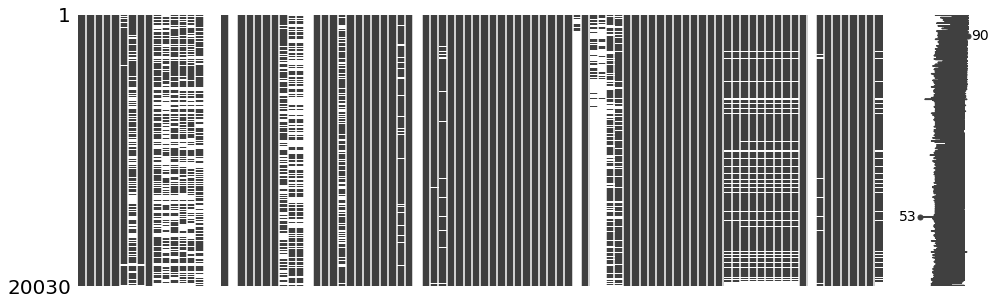

In [14]:
# listings_details.csv NaNs visualization
msno.matrix(listings_det_df, figsize=(16, 5))

<AxesSubplot:>

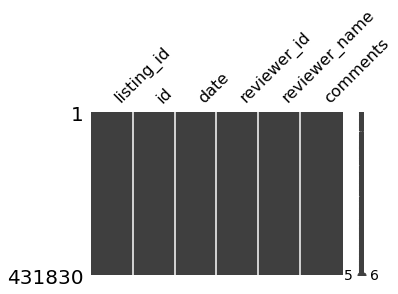

In [15]:
# reviews_details.csv NaNs visualization
msno.matrix(reviews_det_df, figsize=(5, 3))

<AxesSubplot:>

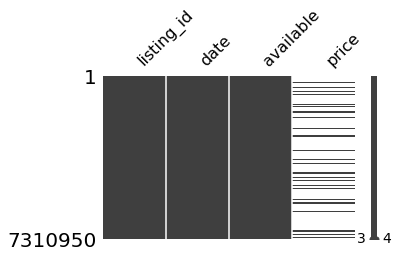

In [16]:
# calendar.csv NaNs visualization
msno.matrix(calendar_df, figsize=(5, 3))

<AxesSubplot:>

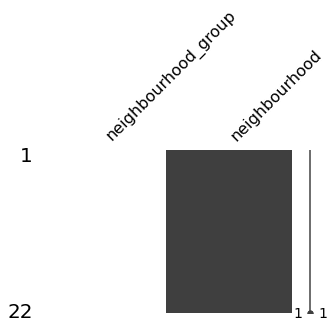

In [17]:
# neighbourhoods.csv NaNs visualization
msno.matrix(neigh_df, figsize=(5, 3))

We see that in general there are **many NaNs** (white lines indicate NaNs). In particular, **there are columns with 100% NaNs** (white columns). These, naturally, won't be of any use for the analysis. Nor will be the columns with close to 100% NaNs. Let's put the **threshold at >95% NaNs**, namely, let's delete the columns with over a 95% NaNs. This might seem like a very high threshold, however, it is better to be careful not to delete too much information at the beggining. Now, we are simply doing a basic check of the useful information that we have a priori.

In [22]:
# Deleting the non-useful attributes (>95% NaNs)
for dataset in [listings_det_df, reviews_det_df, calendar_df, neigh_df]:
    for atr in dataset.columns:
        nan_ratio = dataset[atr].isnull().sum()/len(listings_det_df)
        if (nan_ratio > 0.95):
            dataset.drop(atr, axis=1, inplace=True)

Let's count the attributes again.

In [23]:
# Counting the unique attributes after deleting the non-useful attributes
len(set(list(listings_det_df.columns) +\
        list(reviews_det_df.columns) +\
        list(calendar_df.columns) +\
        list(neigh_df)))

96

So we are left with **4 datasets containing 96 different attributes** (in total) **that are potentially useful**.

## <span style="color:navy"> 4. The goal of this analysis </span>

We haven't yet defined what's the goal of this analysis. Let's do it now that we know how much useful data we have (see section 3).

**The goal**, which might come in the form of a variable that we want to predict, for example, **is not estipulated in the dataset's Kaggle webpage**. Therefore, we will have to look for ideas. **We would like our goals to direct ourselves to the extraction of useful, relevant and even actionable information from the dataset**. This is why **we need to study the attributes in more detail** and see what they tell us. This is what we are going to do next. **Then, we will identify and define the goals**.

### <span style="color:#32CAEC"> 4.1 Analysis of the attributes in more depth </span>

In [ ]:
# show a list of all the attributes and decide to keep them or not
# based on kaggle's info, common sense
# annotate next to each one why they might be useful or not useful, and if they might serve as goal
# identify possible goals already.

### <span style="color:#32CAEC"> 4.2. Definition of the goal </span>

In [ ]:
# define the goal based on the previous study of the attributes

### <span style="color:#32CAEC"> 4.3 Deleting the information that won't be useful for the goal </span>

In [ ]:
# delete stuff like url for example

## <span style="color:navy"> 5. What does the data look like? </span>

In [28]:
# Check if the attributes of listings.csv are contained in listings_details.csv
for atr in listings_df.columns:
    if(not(atr in listings_det_df)):
        print("The attribute", atr,"from listings.csv is NOT contained in listings_details.csv")

The attribute neighbourhood_group from listings.csv is NOT contained in listings_details.csv


## <span style="color:navy"> 6. Data mining </span>